In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("Company_Data.csv")

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

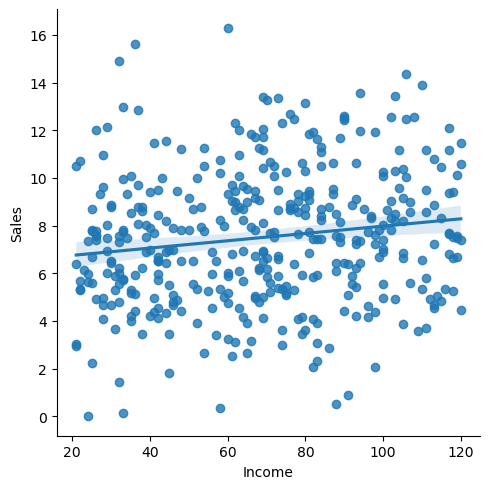

In [7]:
sns.lmplot(x='Income', y='Sales', data=df)

In [8]:
sns.pairplot(df)

In [9]:
df[df.duplicated()].shape

(0, 11)

In [10]:
df['Sales'] = pd.cut(df.Sales,bins=(0,7.49,16.27),labels=['lowsales','highsales'])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,highsales,138,73,11,276,120,Bad,42,17,Yes,Yes
1,highsales,111,48,16,260,83,Good,65,10,Yes,Yes
2,highsales,113,35,10,269,80,Medium,59,12,Yes,Yes
3,lowsales,117,100,4,466,97,Medium,55,14,Yes,Yes
4,lowsales,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,highsales,138,108,17,203,128,Good,33,14,Yes,Yes
396,lowsales,139,23,3,37,120,Medium,55,11,No,Yes
397,lowsales,162,26,12,368,159,Medium,40,18,Yes,Yes
398,lowsales,100,79,7,284,95,Bad,50,12,Yes,Yes


In [11]:
df=df.drop(df.index[[174]],axis=0).reset_index()
df

,index,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,highsales,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1,highsales,111,48,16,260,83,Good,65,10,Yes,Yes
2,2,highsales,113,35,10,269,80,Medium,59,12,Yes,Yes
3,3,lowsales,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4,lowsales,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
394,395,highsales,138,108,17,203,128,Good,33,14,Yes,Yes
395,396,lowsales,139,23,3,37,120,Medium,55,11,No,Yes
396,397,lowsales,162,26,12,368,159,Medium,40,18,Yes,Yes
397,398,lowsales,100,79,7,284,95,Bad,50,12,Yes,Yes


In [12]:
df=df.drop(['index'],axis=1)

In [13]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
label_encoder_x=LabelEncoder()
x=x.apply(LabelEncoder().fit_transform)

In [14]:
x.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban
0,0,49,51,11,141,54,0,17,7,1
1,0,22,27,16,129,18,1,40,0,1
2,0,24,14,10,138,15,2,34,2,1
3,1,28,77,4,249,31,2,30,4,1
4,1,52,42,3,178,62,0,13,3,1


In [15]:
x.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
dtype: int64

In [16]:
y.isnull().sum()

0

In [17]:
rf = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=100,criterion="entropy")
rf

RandomForestClassifier(criterion='entropy', n_jobs=3, oob_score=True)

In [18]:
rf.fit(x,y)

RandomForestClassifier(criterion='entropy', n_jobs=3, oob_score=True)

In [19]:
rf.estimators_

[DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1776346445),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=518917786),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=476595233),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=327067866),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=213894881),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=571141561),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=2072345976),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1972707238),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
           

In [20]:
rf.classes_

array(['No', 'Yes'], dtype=object)

In [21]:
rf.n_outputs_

1

In [22]:
rf.n_features_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


10

In [23]:
rf.oob_score_

0.9072681704260651

In [24]:
rf.predict(x)

array(['Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'N

In [25]:
df['rf_pred'] = rf.predict(x)

In [26]:
cols = ['rf_pred','Sales']
cols

['rf_pred', 'Sales']

In [27]:
df[cols].head()

,rf_pred,Sales
0,Yes,highsales
1,Yes,highsales
2,Yes,highsales
3,Yes,lowsales
4,No,lowsales


In [28]:
df['Sales']

0      highsales
1      highsales
2      highsales
3       lowsales
4       lowsales
         ...    
394    highsales
395     lowsales
396     lowsales
397     lowsales
398    highsales
Name: Sales, Length: 399, dtype: category
Categories (2, object): ['lowsales' < 'highsales']

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df['Sales'],df['rf_pred'])

array([[  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [ 57, 142,   0,   0],
       [ 84, 116,   0,   0]], dtype=int64)

In [30]:
pd.crosstab(df['Sales'],df['rf_pred'])

rf_pred,No,Yes
Sales,,
lowsales,84,116
highsales,57,142
